[0, 1, 2, 3]


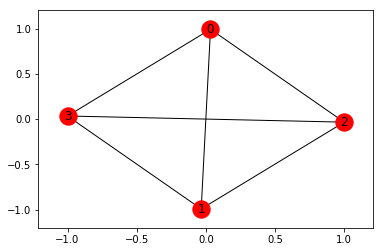

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

from pyquil.api import get_qc

ideal_qc = get_qc("4q-qvm", as_qvm=True, noisy=False)
noisy_qc = get_qc("4q-noisy-qvm", as_qvm=True, noisy=True)

qubits = ideal_qc.qubits()
print(qubits)
graph = ideal_qc.qubit_topology()
nx.draw_networkx(graph, with_labels=True)

## Import and setup logging for info on progress.

In [2]:
from forest_qcvv.quantum_volume import measure_quantum_volume

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
show_progress_bar = True

# Replicate FIG2. of [QVol]  (See forest_qcvv.quantum_volume for ref)

## This is SLOW--it takes about 5 minutes.

In [3]:
ideal_outcomes = measure_quantum_volume(ideal_qc, num_circuits=200, show_progress_bar=show_progress_bar)

INFO:root:Starting depth 2
100%|██████████| 200/200 [00:42<00:00,  4.75it/s]
INFO:root:Starting depth 3
100%|██████████| 200/200 [01:23<00:00,  2.41it/s]
INFO:root:Starting depth 4
100%|██████████| 200/200 [03:29<00:00,  1.05s/it]


## Now with noise; this is SLOW--it takes about 5 minutes, even with half the shots

In [8]:
noisy_outcomes = measure_quantum_volume(noisy_qc, num_circuits=200, num_shots=500, show_progress_bar=show_progress_bar)

INFO:root:Starting depth 2
100%|██████████| 200/200 [00:56<00:00,  3.52it/s]
INFO:root:Starting depth 3
100%|██████████| 200/200 [01:42<00:00,  1.95it/s]
INFO:root:Starting depth 4
100%|██████████| 200/200 [05:43<00:00,  1.72s/it]


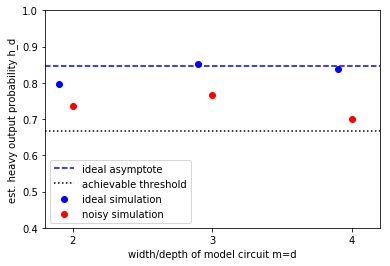

In [11]:
depths = np.arange(2, 5)
ideal_probs = [val[1] for val in ideal_outcomes]
noisy_probs = [val[1] for val in noisy_outcomes]

xlims = (1.8, 4.2)
plt.plot(xlims, [.5+np.log(2)/2]*2, color='b', ls='--')
plt.plot(xlims, [2/3]*2, color='black', ls=':')
plt.scatter(np.array(depths)-.1, ideal_probs, color='b')
plt.scatter(depths, noisy_probs, color='r')
plt.ylabel("est. heavy output probability h_d")
plt.xlabel("width/depth of model circuit m=d")
plt.ylim(.4,1.0)
plt.xlim(*xlims)
plt.xticks(depths)
plt.legend(['ideal asymptote', 'achievable threshold', 'ideal simulation', 'noisy simulation'], loc=3)
plt.show()